In [1]:
import json

In [ ]:
with open('./data/dnf_story_offical_qna.json', 'r') as f:
    dnf_qna = json.load(f)

In [605]:
with open('./data/dnf_story_offical_qna.json', 'r') as f:
    dnf_qna = json.load(f)

del_list = ['671','766','933', '1358','1401'] # 1358,1401 -> 질문 답변은 있지만 띄어쓰기 분리가 안되어 있음
for idx in del_list:
    del data['content'][idx]

In [606]:
import re

question, answer = [], []
fail_contents = []
fail_cnts = 0
for key, contents in data['content'].items():

    questions = list(re.finditer('질문[0-9]*',contents))
    answers = list(re.finditer('답변[0-9]*', contents))

    # 문장이 제대로 완성되지 않았을 경우 제외
    # 질문, 답변의 수가 일치하지 않을 경우 제외
    if ((contents[-3:] != '###') and ('.' not in contents[-3:])) or \
    (len(questions) != len(answers)):
        # print('PASS IDX : ', key)
        continue

    contents = re.sub('###', '', contents)
    # contents = re.sub('[\n]{2,}', '\n\n', contents)

    q_lst, a_lst = [], []
    for content in contents.split('\n'):
        text = content.strip()
        
        if text == '' : 
            continue
        
        if len(text.split(':')[-1]) < 10 : 
            q_lst, a_lst = [], []
            break

        if '질문' in text[:3]:
            q_lst.append(text.split(':')[-1])
        if '답변' in text[:3]:
            a_lst.append(text.split(':')[-1])

    question += q_lst
    answer += a_lst
        
    q_len = len(question) if len(question) > len(answer) else len(question) + fail_cnts
    a_len = len(answer) if len(question) < len(answer) else len(answer) + fail_cnts

    if q_len != a_len:
        print(key)
        fail_contents.append(contents)

len(question), len(answer)

(14533, 14533)

In [607]:
print(fail_contents)

[]


In [413]:
## 1.15일 에러 발견, 10개 데이터 확인. 답변이 \n\n으로만 구분되어 있어서 데이터가 잘 안들어감. 전체 자료에 소수라면 예외처리 진행예정.

In [608]:
# check short data
for q,a in zip(question, answer):
    if (len(q) < 10) or (len(a) < 10):
        print(q)
        print(a)
    

In [ ]:
# print sampels
for i in range(0, 12000, 220):
    print(question[i], '->', answer[i])
    print()


In [382]:
with open('./data/alpaca_data_LF_all_.json', 'r') as f:
    kakao = json.load(f)

In [624]:
with open('./data/dnf_stories_offical.json', 'r') as f:
    offical_story = json.load(f)

with open('./data/dnf_main_story.json', 'r') as f:
    wiki_main_story = json.load(f)

with open('./data/dnf_sub_story.json', 'r') as f:
    wiki_sub_story = json.load(f)

In [625]:
stories = [offical_story, wiki_main_story, wiki_sub_story]

In [630]:
# offical_story : dict() -> dict()
# '대주제_소주제 : {소주제 : 본문}

# wiki_main_story : dict()
# '대주제_소주제 : 본문

# wiki_sub_story : list
# {'카테고리' : 본문}

In [713]:
list(value.values())[0]

'진짜다 하 하늘 위로 가득한 물이라니 저것이 전설로만 전해지던 바다란 거구나소녀의 목소리는 한껏 상기되어 있었다. 그것도 그럴 것이 바다라는 태어나서 처음 보는 것이니 말이다.소녀의 눈을 사로잡은 것은 단지 바다뿐만이 아니었다. 덧없이 푸른 바다가 감싸고 있는 아름다운 섬들 바다 아래로 흘러가는 하얀 구름들. 멀리서 바라보더라도 이곳은 생명이 넘쳐나 보였다. 이 아름다운 섬들이 수십 년간 전쟁이 벌어졌던 황폐한 곳이라니 믿을 수가 없었다.정말 아름답다소녀는 그 아름다운 광경에서 눈을 뗄 수가 없었다. 죽은 자의 성을 죽을 고비를 넘기며 20일에 걸쳐서 힘겹게 올라온 보람이 있었다.고개가 아픈지도 모르게 계속해서 그 바다를 올려보고 있었다. 물론 마계에도 바다라는 것이 있었지만 그 검고 냄새나는 역겨운 바다와는 비교할 수도 없었다.이 아름다운 광경을 바라보던 그녀는 공장으로 가득한 섬을 바라보게 된다. 그곳은 다른 곳과는 무릇 풍경이 달랐다. 이글거리는 용암을 내뱉는 활화산. 마기가 가득한 대기와 대지, 모든 곳에서 마계의 몬스터가 들끓는 이질적인 섬그곳에는 불을 먹는자. 사도 안톤이 전이되어 있었다.말도 안 돼 저 최악의 사도가 이곳에 있었다니 메트로 센터의 전력이 돌아와 이상하게 생각했지만 이런 곳에서 에너지를 빨아먹고 있을 줄이야.이때 소녀의 손에 들린 작은 장치에서 지지직거리는 소리와 함께 어떤 여성의 목소리가 들렸다.지지직 들리시옵니까 연결 상태가 고르지 않사옵니다. 언제 통신이 끊길지아 지금 하늘위로 펼쳐진 아름다운 광경을 보고 있었어요. 이곳은 말로 듣던 것보다 더 아름답습니다 처음에는 죽은 자의 성을 통해서 다른 세상과 연결된다는 것을 믿을 수 없었는데... 사실 지금 이렇게 두 눈으로 확인하고 있어도 실감이 나지 않네요. "소녀도 실감이 나지 않사옵니다. 마계와 이렇게 연락이 가능하게 될 줄이야.... 누가 알았겠사옵니까"소녀와 통신을 하고 있는 것은 바로 슬라우 공업 단지에서 영상 통신 장치를 관리하고 있는 리아 리히터, 천재 멜빈의 여동생이

In [878]:
t_sub, t_des, t_cate = [], [], []

# offcial_story
for key, value in offical_story.items():
    if not (key and value): continue

    if len(list(value.values())[0]) > 512:
        temp_text = ''
        idx = 0
        for split_text in (list(value.values())[0].split('.')):
            if len(temp_text) > 512:
                t_sub.append(key+"_"+str(idx))
                t_des.append(temp_text)
                t_cate.append('스토리')
                temp_text = ''
                idx+=1
            temp_text += (split_text+ '.')

        if temp_text != '':
            t_sub.append(key+"_"+str(idx))
            temp_text = temp_text[:-1] if temp_text[-2:] == '..' else temp_text
            t_des.append(temp_text)
            t_cate.append('스토리')
    
    else:
        t_sub.append(key)    
        t_des.append(list(value.values())[0])
        t_cate.append('스토리')
        


# wiki_main_story
for key, value in wiki_main_story.items():
    if not (key and value): continue

    if len(value) > 512:
        temp_text = ''
        idx = 0
        for split_text in (value.split('.')):
            if len(temp_text) > 512:
                t_sub.append(key+"_"+str(idx))
                t_des.append(temp_text)
                t_cate.append('스토리')
                temp_text = ''
                idx+=1
            temp_text += (split_text+ '.')

        if temp_text != '':
            t_sub.append(key+"_"+str(idx))
            temp_text = temp_text[:-1] if temp_text[-2:] == '..' else temp_text
            t_des.append(temp_text)
            t_cate.append('스토리')

    else:
        t_sub.append(key)    
        t_des.append(value)
        t_cate.append('스토리')

# wiki sub_story
for sub_datas in wiki_sub_story:
    for sub_data in sub_datas:
        for key, value in sub_data.items():
            if not (key and value): continue

            if len(value) > 512:
                temp_text = ''
                idx = 0
                for split_text in (value.split('.')):
                    if len(temp_text) > 512:
                        t_sub.append(key)
                        t_des.append(temp_text)
                        temp = '스토리' if key == '' else '대화'
                        t_cate.append(temp)                        
                        temp_text = ''
                        idx+=1

                    temp_text += (split_text+ '.')

                if temp_text != '':
                    t_sub.append(key)
                    temp_text = temp_text[:-1] if temp_text[-2:] == '..' else temp_text
                    t_des.append(temp_text)
                    temp = '스토리' if key == '' else '대화'
                    t_cate.append(temp)
            
            else:
                t_sub.append(key)    
                t_des.append(value)
                temp = '스토리' if key == '' else '대화'
                t_cate.append(temp)


# # stroy_qna
# for q, a in zip(question, answer):
#     t_sub.append(q)
#     t_des.append(a)
#     t_cate.append('스토리')

In [828]:
# 대화 데이터에서 문장, 대상, 대화 참여자 정보, 내용을 추출
subject, descriptions, cate = [], [], []

# offical_story
for key, value in offical_story.items():
    if not (key and value): continue
    subject.append(key)    
    descriptions.append(list(value.values())[0])
    cate.append('Story')

# wiki_main_story
for key, value in wiki_main_story.items():
    if not (key and value): continue
    subject.append(key)    
    descriptions.append(value)
    cate.append('Story')
    
# wiki_sub_story
for sub_datas in wiki_sub_story:
    for sub_data in sub_datas:
        for key, value in sub_data.items():
            if not (key and value): continue
            subject.append('')    
            descriptions.append(value)
            temp = 'Story' if key == '' else 'Dialogue_'+ key
            cate.append(temp)

for q, a in zip(question, answer):
    subject.append(q)
    descriptions.append(a)
    cate.append('Story_qna')

In [861]:
len(subject), len(descriptions), len(cate)

(18363, 18363, 18363)

In [879]:
len(t_sub), len(t_des), len(t_cate)

(5358, 5358, 5358)

In [880]:
# all_texts_with_tokens = [
#     {'subject' : s.strip(), 'content' : d.strip(), 'category' : c.strip()} for s, d, c in zip(subject, descriptions, cate)
# ]

all_texts_with_tokens = [
    {'subject' : s.strip(), 'content' : d.strip(), 'category' : c.strip()} for s, d, c in zip(t_sub, t_des, t_cate)
]


In [881]:
import json

for dnf_data in all_texts_with_tokens:
    with open("./data/dnf_all_story_div512_without_qna.jsonl", "a", encoding="utf-8") as f:
        json.dump(dnf_data, f, ensure_ascii=False) # ensure_ascii로 한글이 깨지지 않게 저장
        f.write("\n")

In [ ]:
# 데이터
with open('./data/dnf_all_story_div512_without_qna.jsonl', 'r') as f:
  dnf_story_data = json.load(f)

In [877]:
t_des[-100], t_sub[-12340], t_cate[-100]

(' 고블린은 샹들리에 위에 올라가 있습니다.', ' 시란은 어떤 능력을 가지고 있는가?', '스토리')

In [848]:
import random
random.seed(777)

print(all_texts_with_tokens[-16000])
random.shuffle(all_texts_with_tokens)
print(all_texts_with_tokens[-16000])

{'subject': '몬스터/생물_투창의 욤', 'content': '노스마이어에서 활동하던 도둑이었던 그녀는, 여섯 개의 부메랑처럼 생긴 투창을 동시에 던지는 신기를 가진 유명한 도적이었다.하지만 노스마이어가 전염병에 황폐해지고, 도적 단이 모두 죽어 나가는 것을 보고 재빨리 그곳을 빠져나왔다.어쩔 수 없이 벨마이어 공국 안쪽으로 들어가야 했지만 이미 현상수배범이 되어 있어 도둑질 외에는 할 수 있는 일이 없었다.그러다 일확천금을 할 수 있다는 무한의 제단으로 향했다가 실수로 극한의 제단으로 향해버리고 말았다.아직도 본인은 자신이 있는 곳이 무한의 제단인 줄 알고 열심히 극한의 제단에서 싸우고 있다.', 'category': 'Story'}
{'subject': '모험가들은 왜 사막 깊숙한 곳으로 여행을 하나요?', 'content': '모험가들은 사막 깊숙한 곳에 무엇이 기다리고 있는지 알아보기 위해 여행을 합니다.', 'category': 'Story_qna'}


In [574]:
pattern_instruction = 'prompt'  # instruction
pattern_input = 'input'  # 내 데이터엔 input이 없다
pattern_output = 'completion'  # output

# prompt_no_input.format_map(example)

dnf_story_datas = []

for s in stories:
    for key, texts in s.items():
        
        for sub_key, text in texts.items():
            sub_key = sub_key[:-1] if sub_key[-1] == '_' else sub_key

            dnf_story_datas.append({pattern_instruction : f"'{sub_key}'에 대한 설명 혹은 이야기입니다.", pattern_output : text, 'category' : 'story'})



In [575]:
for q,a in zip(question, answer):
    dnf_story_datas.append({pattern_instruction : q, pattern_output : a})

In [611]:
# !pip install jsonlines
import jsonlines

data = []
with jsonlines.open("./data/dnf_story_data.jsonl") as f:
    for line in f.iter():
    	data.append(line)


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [583]:
import json
from collections import OrderedDict

# my_data = OrderedDict()
# my_data["id"] = "this is id"
# my_data["title"] = "this is title"
for dnf_data in dnf_story_datas:
    with open("./data/dnf_story_data.jsonl", "a", encoding="utf-8") as f:
        json.dump(dnf_data, f, ensure_ascii=False) # ensure_ascii로 한글이 깨지지 않게 저장
        f.write("\n") # json을 쓰는 것과 같지만, 여러 줄을 써주는 것이므로 "\n"을 붙여준다.

In [701]:
dnf_story_datas[-1]

{'prompt': ' 사샤는 어떠한 마음씨를 가지고 있나요?',
 'completion': ' 사샤는 작은 미물마저 사랑하는 넓은 마음씨를 가지고 있습니다.'}

In [644]:
# 대화형 텍스트와 설명 텍스트, 그리고 각 사용자 정보
conversations_and_descriptions_and_users = [
    ("안녕하세요?", "일반 대화", "User1"),
    ("오늘 날씨 어때요?", "날씨", "User2"),
    ("뭐 해요?", "업무", "User3"),
    ("자연에 대해 설명해주세요.", "자연에는 다양한 생태계가 존재하며, 생명이 풍부합니다.", ''),
    ("과학에 대해 설명해주세요.", "과학은 자연 현상을 이해하고 설명하기 위한 학문입니다.")
]

# 대화 데이터에서 문장, 대상, 대화 참여자 정보, 내용을 추출
utterances, descriptions, users = [], [], []
for item in conversations_and_descriptions_and_users:
    utterances.append(item[0])
    descriptions.append(item[1] if len(item) > 2 else None)
    
    temp = item[2] if len(item) > 2 else 'Story'
    temp = temp if len(temp) else 'Story'
    users.append(temp)

In [882]:
alpaca = []
with jsonlines.open("./data/alpaca/KoAlpaca_v1.1.jsonl") as f:
    for line in f.iter():
    	alpaca.append(line)

In [ ]:
for a in alpaca[:10]:
    for k, v in a.items():
        print(k)
        print(v)
        print()

In [6]:
with open('./data/alpaca/kochatgpt_2_RM.jsonl', 'r') as f:
    kogpt = json.load(f)

In [ ]:
for a in kogpt[:10]:
    for k, v in a.items():
        print(k)
        print(v)
        print()

In [17]:
kogpt[0]['completion_'+str(kogpt[0]['ranking'].index(1))]

'번디는 다양한 인터뷰자들과 뉴스홍보 담당자들과의 면담 때 밝혔다.'

In [ ]:
dnf_data_RM

In [32]:
rm_data[1]

IndexError: list index out of range

In [39]:
list_data_dict[0]['completion_'+str(list_data_dict[0]['ranking'].index(0))]

'소녀는 처음으로 넓은 바다를 보고 감탄하며 그 아름다움에 매료되었습니다. 그러나 그녀가 바라본 바다 주변의 섬은 과거 전쟁으로 황폐해진 곳이었습니다. 이곳에서 바다와 다른 풍경을 이루는 활화산이 있는 섬에 사도 안톤이 존재했다는 사실에 놀라움을 감추지 못했습니다. 소녀는 마계와 천계를 이어주는 통신 장치를 통해 연결된 리아 리히터와 통신을 하며, 자신이 마계에서 사라진 사도들을 찾는 데에 중요한 역할을 할 것이라는 기대감을 주고받습니다. 그러나 갑자기 차원의 틈이 닫혀 통신은 끊기고, 이제 그녀는 천계와 마계의 경계에서 불확실한 미래를 향해 자신의 역할을 다하기 위해 각오를 다집니다.'

In [34]:
import json
with open('./data/dnf_story_1Q3A.json') as f:
    dnf_data_RM = json.load(f)

In [35]:
def check_len(q, l, m, s):
    return (len(q) == len(l) == len(m)  == len(s))

In [36]:
q_t, l_t, m_t, s_t = [], [], [], []

cnt = 0
for key, value in dnf_data_RM['content'].items():
    try:
        # value = re.sub('[가-힣]*(질문|장문|중문|단문)[ :]+', '', value)
        value = re.sub('###', '', value)
        # value = re.sub('\n{2,}', '\n', value)

        tmp_q, tmp_l, tmp_m, tmp_s = [], [], [], []
            
        for line in value.split('\n'):
            if '질문과' in line[:3] : continue
            
            if '질문' in line[:3]:
                tmp_q.append(re.sub('[가-힣]*(질문|장문|중문|단문)[ :]+', '', line))
                continue
            elif '장문' in line[:3]:
                tmp_l.append(re.sub('[가-힣]*(질문|장문|중문|단문)[ :]+', '', line))
                continue
            elif '중문' in line[:3]:
                tmp_m.append(re.sub('[가-힣]*(질문|장문|중문|단문)[ :]+', '', line))
                continue
            elif '단문' in line[:3]:
                tmp_s.append(re.sub('[가-힣]*(질문|장문|중문|단문)[ :]+', '', line))
                continue

        
        if check_len(tmp_q, tmp_l, tmp_m, tmp_s):
            q_t += tmp_q
            l_t += tmp_l
            m_t += tmp_m
            s_t += tmp_s
            cnt+=1
        else:
            raise()
    except:
        # print('---')
        # print(key, value)
        # print('---')
        pass




len(dnf_data_RM['content']) - cnt

2768

In [37]:
len(q_t), len(l_t), len(m_t), len(s_t)

(0, 0, 0, 0)

In [ ]:
dnf_data_RM['content']

In [27]:
import random
rd = []
for i in range(len(dnf_data_RM['content'])):
    tmp = []
    tmp.append((random.choices(range(0,3), weights=[0.8, 0.15, 0.05]))[0])
    
    while True:
        num = (random.choices(range(0,3), weights=[0.7, 0.2, 0.1]))[0]
        if num in tmp: continue
        tmp.append(num)

        if len(tmp) == 3:
            break
        
    
    rd.append(tmp)

In [ ]:
text = '통신_ 질문 : 바다와 전쟁의 흔적, 그리고 마계의 사도들에 대한 이야기를 요약 해주세요. ###'

re.sub('[가-힣]*(질문|장문|중문|단문)[ :]+', '', value) # 질문


In [29]:
rm_data = []
for q, l, m, s, rank in zip(q_t, l_t, m_t, s_t, rd):
    rm_data.append({
        'prompt': q.strip(),
        'completion_0' : l.strip(),
        'completion_1' : m.strip(),
        'completion_2' : s.strip(),
        'ranking' : rank
    })

In [1084]:
with open('./data/dnf_data_RM.json', 'w') as f:
    json.dump(rm_data, f)

In [38]:
with open('./dnf_data_RM.json', 'r', encoding='utf-8-sig') as json_file:
    list_data_dict = json.load(json_file)
    if True:
        print('## data check ##')
        print((list_data_dict[0]))

## data check ##
{'prompt': '바다와 전쟁의 흔적, 그리고 마계의 사도들에 대한 이야기를 요약 해주세요.', 'completion_0': '소녀는 처음으로 넓은 바다를 보고 감탄하며 그 아름다움에 매료되었습니다. 그러나 그녀가 바라본 바다 주변의 섬은 과거 전쟁으로 황폐해진 곳이었습니다. 이곳에서 바다와 다른 풍경을 이루는 활화산이 있는 섬에 사도 안톤이 존재했다는 사실에 놀라움을 감추지 못했습니다. 소녀는 마계와 천계를 이어주는 통신 장치를 통해 연결된 리아 리히터와 통신을 하며, 자신이 마계에서 사라진 사도들을 찾는 데에 중요한 역할을 할 것이라는 기대감을 주고받습니다. 그러나 갑자기 차원의 틈이 닫혀 통신은 끊기고, 이제 그녀는 천계와 마계의 경계에서 불확실한 미래를 향해 자신의 역할을 다하기 위해 각오를 다집니다.', 'completion_1': '바다를 처음 본 소녀는 과거 전쟁터였던 섬의 아름다움에 놀랍니다. 그리고 통신기를 통해 리아와 사도 안톤의 존재 및 상황을 나누며 정보를 주고받지만, 차원의 틈이 닫혀 다시 연락을 기다려야 하는 상황에 처하게 됩니다.', 'completion_2': '바다에 감탄한 소녀가 마계의 사도들과 관련한 중요한 통신을 하다 차원의 틈이 닫혀 소통이 끊깁니다.', 'ranking': [0, 2, 1]}


In [1093]:
m_t[2200]

"'플레인 : 인퍼널'에서 이단심판관들은 위장자가 된 세계에서 자신들을 저주받은 불꽃이라 칭하며 자신들만의 길을 걷기 시작했습니다. 이들은 혼돈의 신에게 복종하지 않았지만, 여전히 신을 향한 믿음만큼은 갖고 있었습니다. 그러나 위장자의 기운으로 인해 불꽃이 검보라빛으로 변하면서 더욱 강력해졌습니다. 마침내 모든 위장자를 소멸시키고 아라드에 평화를 가져다줬습니다."

In [41]:
with open('./data/dnf_story_offical_qna2.json', 'r') as f:
    dnf_qnas = json.load(f)

In [47]:
for content in dnf_qnas['content'].values():


'질문0 : 리아가 알게 된 정보를 니우에게 알려준 것은 무엇인가요?\n답변0 : 리아는 죽은 자의 성에서 전송되는 전자 잡음이 사도들의 행적 정보를 니우에게 전달하는 것을 알아냈습니다.###\n\n질문1 : 리아는 어떤 마계의 마법사인가요?\n답변1 : 리아는 니우에게 사도들을 추격하고 있는 마계의 마법사라고 알려주었습니다.###\n\n질문2 : 니우는 왜 죽은 자의 성으로 올라갔을까요?\n답변2 : 니우는 모든 것을 파괴하고 먹어 치우는 사도들의 악행을 막기 위해 죽은 자의 성으로 올라 차원의 틈이 천계와 마계를 이어주기를 기다리고 있었습니다.###\n\n질문3 : 파워 스테이션을 누가 점거하고 있나요?\n답변3 : 파워 스테이션을 점거하고 있는 안톤의 수호자들이 있습니다.###\n\n질문4 : 안톤은 어떤 특징이 있나요?\n답변4 : 안톤은 이글거리는 용암을 내뿜고 있는 활화산으로 모든 곳에서 마계의 몬스터가 들끓는 이질적인 섬입니다.###\n\n질문5 : 리아의 도움을 받기 위해서는 어떤 일을 해야 하나요?\n답변5 : 리아와 통신이 다시 이뤄질 때까지 우선은 파워 스테이션을 점거하고 있는 안톤의 수호자들을 몰아내야 합니다.###\n\n질문6 : 리아와의 통신이 끊긴 이유는 무엇인가요?\n답변6 : 차원의 틈이 닫혀 차원의 틈이 끊긴 것으로 추측되며, 따라서 리아와의 통신이 끊긴 것입니다.###\n\n질문7 : 안톤의 수호자들을 몰아내기 위해 필요한 것은 무엇인가요?\n답변7 : 안톤의 수호자들을 몰아내기 위해서는 용맹한 모험가들의 도움이 필요합니다.###\n\n질문8 : 페럴 웨인은 무슨 역할을 하고 있나요?\n답변8 : 페럴 웨인은 멜빈과 각별한 사이로, 전기 계통의 전문가로서 파워 스테이션의 복구와 안톤의 약점 분석을 위해서 슬라우 공업단지로 파견되었습니다.###\n\n질문9 : 리아가 니우에게 전달한 정보에 따라 니우는 어떤 결정을 내리게 되었나요?\n답변9 : 니우는 사도 안톤을 해치우기 위해 도움을 받기 위해 리아와 연락을 취하고, 안톤의 수

In [69]:
import re
from tqdm import tqdm

tmp_q, tmp_a = [], []
except_data= []

for qna in tqdm(dnf_qnas['content'].values()):
    try:
        for txt in qna.split('###'):
            check_data = re.search('질문[0-9][가-힣 :]+', txt)
            if check_data:
                if check_data.end() < 4 : raise()

                txt = re.sub('\n\n', '', txt)
                q,a = txt.split('\n')
                if '?' in a:
                    break
                tmp_q.append(q)
                tmp_a.append(a)
    except:
        except_data.append(qna)
        continue


100%|██████████| 2035/2035 [00:00<00:00, 28250.13it/s]


In [72]:
len(tmp_q), len(tmp_a)

(10582, 10582)

In [73]:
tmp_q[0]

'질문0 : 리아가 알게 된 정보를 니우에게 알려준 것은 무엇인가요?'

In [79]:
q_list, a_list = [], []
p = re.compile('(질문|답변)[0-9 :]+')

for q, a in zip(tmp_q, tmp_a):
    q_list.append(p.sub('', q))
    a_list.append(p.sub('', a))


    

In [80]:
q_list[:10]

['리아가 알게 된 정보를 니우에게 알려준 것은 무엇인가요?',
 '리아는 어떤 마계의 마법사인가요?',
 '니우는 왜 죽은 자의 성으로 올라갔을까요?',
 '파워 스테이션을 누가 점거하고 있나요?',
 '안톤은 어떤 특징이 있나요?',
 '리아의 도움을 받기 위해서는 어떤 일을 해야 하나요?',
 '리아와의 통신이 끊긴 이유는 무엇인가요?',
 '안톤의 수호자들을 몰아내기 위해 필요한 것은 무엇인가요?',
 '페럴 웨인은 무슨 역할을 하고 있나요?',
 '리아가 니우에게 전달한 정보에 따라 니우는 어떤 결정을 내리게 되었나요?']

In [81]:
a_list[:10]

['리아는 죽은 자의 성에서 전송되는 전자 잡음이 사도들의 행적 정보를 니우에게 전달하는 것을 알아냈습니다.',
 '리아는 니우에게 사도들을 추격하고 있는 마계의 마법사라고 알려주었습니다.',
 '니우는 모든 것을 파괴하고 먹어 치우는 사도들의 악행을 막기 위해 죽은 자의 성으로 올라 차원의 틈이 천계와 마계를 이어주기를 기다리고 있었습니다.',
 '파워 스테이션을 점거하고 있는 안톤의 수호자들이 있습니다.',
 '안톤은 이글거리는 용암을 내뿜고 있는 활화산으로 모든 곳에서 마계의 몬스터가 들끓는 이질적인 섬입니다.',
 '리아와 통신이 다시 이뤄질 때까지 우선은 파워 스테이션을 점거하고 있는 안톤의 수호자들을 몰아내야 합니다.',
 '차원의 틈이 닫혀 차원의 틈이 끊긴 것으로 추측되며, 따라서 리아와의 통신이 끊긴 것입니다.',
 '안톤의 수호자들을 몰아내기 위해서는 용맹한 모험가들의 도움이 필요합니다.',
 '페럴 웨인은 멜빈과 각별한 사이로, 전기 계통의 전문가로서 파워 스테이션의 복구와 안톤의 약점 분석을 위해서 슬라우 공업단지로 파견되었습니다.',
 '니우는 사도 안톤을 해치우기 위해 도움을 받기 위해 리아와 연락을 취하고, 안톤의 수호자들을 몰아낸 후에 리아와의 연락을 기다릴 결정을 내렸습니다.']

In [82]:
for q, a in zip(q_list, a_list):
    with open("./data/dnf_short_qna.jsonl", "a", encoding="utf-8") as f:
        json.dump({'prompt' : q, 'completion' : a }, f, ensure_ascii=False) # ensure_ascii로 한글이 깨지지 않게 저장
        f.write("\n")


In [84]:
import jsonlines
data = []
with jsonlines.open("./data/dnf_short_qna.jsonl") as f:
    for line in f.iter():
    	data.append(line)

In [96]:
import jsonlines
a_story = []
with jsonlines.open("./data/dnf_story_data.jsonl") as f:
    for line in f.iter():
    	a_story.append(line)

In [304]:
with open('./data/dnf_main_story_token_1024.json', 'r') as f:
    main_story = json.load(f)

with open('./data/dnf_stories_offical.json', 'r') as f:
    offical_story = json.load(f)

with open('./data/dnf_data_RM.json', 'r') as f:
    rm_data = json.load(f)

In [305]:
from soynlp.normalizer import repeat_normalize

def preprocessing_dnf(txt):
    x = re.sub('[^가-힣0-9,. \'\"\(\)眞]', '', txt)
    x = x.strip()
    x = repeat_normalize(x, num_repeats=2)
    return x

In [310]:
main_stories = []
for key, value in main_story.items():
    if value == '\n' : pass
    
    key = re.sub('_[0-9]+', '' , key)

    title = preprocessing_dnf(key)
    content = preprocessing_dnf(value)
    main_stories.append({'prompt' : title+'에 대한 이야기 입니다.', 'completion' : content})


In [312]:
len(main_stories)

3548

In [311]:
for key, value in offical_story.items():

    for title, content in value.items():
        title = re.sub('_', ' ', title).strip()
        title = preprocessing_dnf(title)
        content = preprocessing_dnf(content)
        
        txt = ''
        for tmp in content.split('.'):
            if len(tmp) < 2 : continue
            
            if len(txt) > 900:
                main_stories.append({'prompt' : title+'에 대한 이야기 입니다.', 'completion' : txt})
                txt = ''
            
            txt+=tmp
        
        if txt!='':
            main_stories.append({'prompt' : title+'에 대한 이야기 입니다.', 'completion' : txt})


In [313]:
for x in rm_data:
    main_stories.append({'prompt' : preprocessing_dnf(x['prompt']), 'completion' : preprocessing_dnf(x['completion_'+str(x['ranking'].index(0))])})

In [314]:
for q, a in zip(q_list, a_list):
    main_stories.append({'prompt' : q, 'completion' : a })


In [315]:
len(main_stories)

16898

In [316]:
for story in main_stories:
    with open("./data/dnf_story_forTrain_tokenFor1024.jsonl", "a", encoding="utf-8") as f:
        json.dump(story, f, ensure_ascii=False) # ensure_ascii로 한글이 깨지지 않게 저장
        f.write("\n")


In [88]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("EleutherAI/polyglot-ko-12.8b")

In [269]:
# fitting prefix form
over_text = []
origin = []
for x in tqdm(main_stories):
    encode = tokenizer.encode(f"### 질문: {x['prompt']}\n\n### 답변: {x['completion']}<|endoftext|>")
    if len(encode) > 1024:
        origin.append(x)
        over_text.append(encode)


  0%|          | 0/16194 [00:00<?, ?it/s]

100%|██████████| 16194/16194 [00:10<00:00, 1593.47it/s]


(array([95., 42., 13.,  5.,  4.,  2.,  0.,  0.,  1.,  2.]),
 array([ 1038.,  2134.,  3230.,  4326.,  5422.,  6518.,  7614.,  8710.,
         9806., 10902., 11998.]),
 <BarContainer object of 10 artists>)

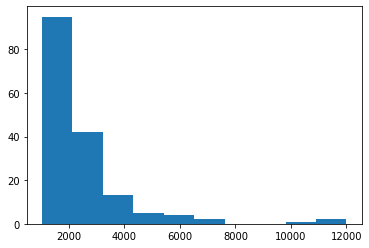

In [277]:
import matplotlib.pyplot as plt


plt.hist([len(x) for x in over_text])

In [ ]:
[len(x) for x in over_text]

In [281]:
tokenizer.decode(over_text[8])

'### 질문: 프레이이시스 격추전에 대한 이야기 입니다.\n\n### 답변: 한편, 케이트는 이제 막 숙주에서 빠져나온 히카르도가 무사히 할렘 중심가에 도달하지 못했을 거라고 판단. 그가 몸을 숨겼을 것으로 추정되는 밤의 마천루를 목적지로 특정하는데 성공하나 얼마 안가 토벌단은 난관에 봉착한다. 밤의 마천루 전체에 이시스의 기운이 만연하고 있었기에, 알의 정확한 위치를 파악할 수 없었기 때문이다. 이때, 블라섬은 프레이가 아서의 정신에 간섭한 것을 근거로 아서와 프레이가 연결되어 있다는 추측해 블라섬과 알렉산드라는 아서를 통해서 프레이에게 신호를 보내 모험가를 창공으로 올려보낸다.그렇게 모험가는 마계의 하늘에서 프레이와 만나는데 성공한다. 프레이는 이시스와의 대결 후유증에서 천천히 회복 중이었으며 고향인 테이베르스를 구해준 것에 대한 감사하나 마땅한 보상도 하지 못하고 또 다른 부탁을 해야 하는 미안한 마음을 전한다. 가장 급박한 이시스의 사태의 해결을 위해선 프레이가 이시스를 흡수하는 것이 최선이지만 완전한 상태가 아닐 때, 섣불리 이시스를 흡수했다가 그의 악성을 정화하지 못해 삼켜지는 것을 염려하고 있었다. 현재 최선의 수로 이시스가 완전히 깨어나기 전에 알에 담긴 힘을 약화시켜 단숨에 흡수한다는 해답을 제시한다. 모험가에게 계획을 전달한 프레이는 추종자 아서에게 알의 위치를 특정할 수 있는 힘을 나눠주었고, 토벌단은 아서의 인도를 따라 밤의 마천루로 침입한다.허나 프레이의 바람과 달리 사태는 시간이 흐를수록 더더욱 심화되고 있었다. 이시스의 추종자들은 시간이 지날수록 늘어나고 카쉬파도 행방불명된 히카르도를 찾으러 밤의 마천루에 수색대를 풀었기 때문이다. 혼란의 삼파전 속에서 탐색을 계속하던 토벌단은 마침내 \'신록의 프렉세스\'와 조우한다. 그는 고대 신전의 수호자인 \'오메가 가디언\'에게 붙잡혀 있었는데, 토벌단은 오메가 가디언이 이시스의 기운에 잠식되었다고 판단하고 가디언을 파괴하여 신록의 프렉세스를 구출한다. 그런데 오메가 가디언은 쓰러지면서 모